# **ANÁLISE EXPLORATÓRIA - Produções científicas dos pesquisadores do IFMA**

![](https://escolaeducacao.com.br/wp-content/uploads/2018/08/intituto-federal-maranhao-ifma-cursos.png)

# IMPORTAÇÃO DAS BIBLIOTECAS
Serão utilizadas as bibliotecas: Pandas para visualização e manipulação dos dados e Matplotlib para a criação de gráficos


In [49]:
import pandas as pd 
import matplotlib.pyplot as plt

# Visualização dos dados
As 5 primeiras e 5 ultimas linhas da tabela

In [45]:
tabela = pd.read_excel('dataset.xlsx')
tabela.head()

,#,Matrícula,Nome,E-mail para Contato,Cargo,Funções,Situação,Campus de Lotação,Setor de Lotação,Campus Exercício,Setor Exercício,Campus SUAP,Setor SUAP,Disciplina de Ingresso,Excluído
0,1,2037010,Abel Batista de Oliveira,abel.oliveira@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,NaN,ATIVO PERMANENTE - 01,ACA ilandia,DDE-ACA,ACA,DE-ACA,ACA,DE-ACA,Ciências Agronômicas,Não
1,2,1829709,Abias Rodrigues da Cruz,abias.cruz@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,CD4 - DEPEX-COD:COORDENADOR(A) DE CURSOS \n,ATIVO PERMANENTE - 01,CODo,DDE-COD,COD,DEPEX-COD,COD,DEPEX-COD,Matemática/Matemática Estatística,Não
2,3,1825579,Abigail Ferreira Milen,abigail.milen@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,NaN,ATIVO PERMANENTE - 01,BAC (barra do corda),CAMP-BAC,BAC,DEN-BAC,BAC,DEN-BAC,Geografia,Não
3,4,1845623,Abilio Soares Coelho,abilio.coelho@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,FUC1 - CCSTSI-TMN:COORDENADOR(A) DE CURSOS \n,ATIVO PERMANENTE - 01,TMN(timon),CAMP-TMN,TMN,DE-TMN,TMN,CCSTSI-TMN,INFORMÁTICA/SUPORTE DE REDES,Não
4,5,1487179,Abmalena Santos Sanches,abmalenass@ifma.edu.br,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,NaN,ATIVO PERMANENTE - 01,ALC(alcantara),CAMP-ALC,ALC,DE-ALC,ALC,DE-ALC,Sociologia,Não


# Informações da Tabela
Nome e tipo de dados de cada coluna, a quantidade de valores não nulos e o uso de memória.

In [4]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       3781 non-null   int64 
 1   Matrícula               3781 non-null   int64 
 2   Nome                    3781 non-null   object
 3   E-mail para Contato     3717 non-null   object
 4   Cargo                   3781 non-null   object
 5   Funções                 775 non-null    object
 6   Situação                3781 non-null   object
 7   Campus de Lotação       3351 non-null   object
 8   Setor de Lotação        3781 non-null   object
 9   Campus Exercício        3781 non-null   object
 10  Setor Exercício         3781 non-null   object
 11  Campus SUAP             3578 non-null   object
 12  Setor SUAP              3781 non-null   object
 13  Disciplina de Ingresso  2393 non-null   object
 14  Excluído                3781 non-null   object
dtypes: i

None

**A tabela possui 15 colunas e 3.781 linhas, as colunas de 'E-mail para Contato', 'Funções', 'Campus de Lotação', 'Campus SUAP' e  'Disciplina de Ingresso' possuem linhas sem informações**

# Limpeza inicial
Remoção dos servidores que constam com o status de "APOSENTADO" na coluna "Situação"

In [40]:
tabela = tabela.drop(tabela[tabela['Situação'] == 'APOSENTADO - 02'].index)
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3437 entries, 0 to 3779
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       3437 non-null   int64 
 1   Matrícula               3437 non-null   int64 
 2   Nome                    3437 non-null   object
 3   E-mail para Contato     3427 non-null   object
 4   Cargo                   3437 non-null   object
 5   Funções                 775 non-null    object
 6   Situação                3437 non-null   object
 7   Campus de Lotação       3351 non-null   object
 8   Setor de Lotação        3437 non-null   object
 9   Campus Exercício        3437 non-null   object
 10  Setor Exercício         3437 non-null   object
 11  Campus SUAP             3431 non-null   object
 12  Setor SUAP              3437 non-null   object
 13  Disciplina de Ingresso  2207 non-null   object
 14  Excluído                3437 non-null   object
dtypes: int64(

None

Agora a tabela possui apenas 3.437 linhas, significando que dos 3.781 servidores, 344 são aposentados



Além do status "APOSENTADO - 02", a coluna "Situação" também possui os seguintes status:

In [23]:
contagemSituacao = tabela['Situação'].value_counts()
display(contagemSituacao)

Situação
ATIVO PERMANENTE - 01        3116
CONT.PROF.SUBSTITUTO - 52     206
EXERC. 7  ART93 8112 - 44      61
ATIVO EM OUTRO ORGAO - 08      24
CEDIDO/REQUISITADO - 03         6
COLAB PCCTAE E MAGIS - 41       6
CONTRATO TEMPORARIO - 12        6
EXERCICIO PROVISORIO - 19       5
EXCEDENTE A LOTACAO - 11        4
EXERC DESCENT CARREI - 18       2
CLT ANS -DEC 6657/08 - 43       1
Name: count, dtype: int64

Remoção das colunas que não serão utilizadas na análise

In [20]:
tabela2 = tabela.drop(columns=['#','Matrícula','E-mail para Contato','Funções','Campus de Lotação','Setor de Lotação',
                               'Setor Exercício','Campus SUAP','Setor SUAP','Disciplina de Ingresso','Excluído'])
display(tabela2)

,Nome,Cargo,Situação,Campus Exercício
0,Abel Batista de Oliveira,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,ACA
1,Abias Rodrigues da Cruz,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,COD
2,Abigail Ferreira Milen,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,BAC
3,Abilio Soares Coelho,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,TMN
4,Abmalena Santos Sanches,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,ALC
...,...,...,...,...
3774,Zedequias de Oliveira Campos Junior,TEC DE TECNOLOGIA DA INFORMACAO (PCIFE) - 701226,ATIVO PERMANENTE - 01,TMN
3775,Zeila Sousa de Albuquerque,PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...,ATIVO PERMANENTE - 01,CCH
3777,Zildiany Ibiapina Meneses,PROF ENS BAS TEC TECNOLOGICO-SUBSTITUTO (CMEBT...,CONT.PROF.SUBSTITUTO - 52,PED
3778,Zilner Callera,ZOOTECNISTA (PCIFE) - 701085,ATIVO PERMANENTE - 01,GRA


# CARGOS


No total existem 146 cargos onde o maior número é de professores,assitentes e técnicos 

In [56]:
contagemCargo = tabela['Cargo'].value_counts().reset_index()
print(contagemCargo)

                                                 Cargo  count
0    PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...   1839
1         ASSISTENTE EM ADMINISTRACAO (PCIFE) - 701200    348
2    PROF ENS BAS TEC TECNOLOGICO-SUBSTITUTO (CMEBT...    206
3         TECNICO DE LABORATORIO AREA (PCIFE) - 701244    129
4    TECNICO EM ASSUNTOS EDUCACIONAIS (PCIFE) - 701079    110
5                 ASSISTENTE DE ALUNO (PCIFE) - 701403     97
6      PROFESSOR DO MAGISTERIO SUPERIOR (CMS) - 705001     91
7     TEC DE TECNOLOGIA DA INFORMACAO (PCIFE) - 701226     61
8                AUX EM ADMINISTRACAO (PCIFE) - 701405     58
9                       PEDAGOGO-AREA (PCIFE) - 701058     57
10             AUXILIAR DE BIBLIOTECA (PCIFE) - 701409     46
11       BIBLIOTECARIO-DOCUMENTALISTA (PCIFE) - 701010     42
12                      ADMINISTRADOR (PCIFE) - 701001     39
13              TECNICO EM ENFERMAGEM (PCIFE) - 701233     37
14                  ASSISTENTE SOCIAL (PCIFE) - 701006     34
15   TRA

Os cargos que possuem mais servidores são os seguintes:

In [13]:
contagemCargo = tabela['Cargo'].value_counts().reset_index()
top3_valores = contagemCargo.head(10)
print(top3_valores)

                                               Cargo  count
0  PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) ...   1839
1       ASSISTENTE EM ADMINISTRACAO (PCIFE) - 701200    348
2  PROF ENS BAS TEC TECNOLOGICO-SUBSTITUTO (CMEBT...    206
3       TECNICO DE LABORATORIO AREA (PCIFE) - 701244    129
4  TECNICO EM ASSUNTOS EDUCACIONAIS (PCIFE) - 701079    110
5               ASSISTENTE DE ALUNO (PCIFE) - 701403     97
6    PROFESSOR DO MAGISTERIO SUPERIOR (CMS) - 705001     91
7   TEC DE TECNOLOGIA DA INFORMACAO (PCIFE) - 701226     61
8              AUX EM ADMINISTRACAO (PCIFE) - 701405     58
9                     PEDAGOGO-AREA (PCIFE) - 701058     57


Visualização dos cargos em gráfico

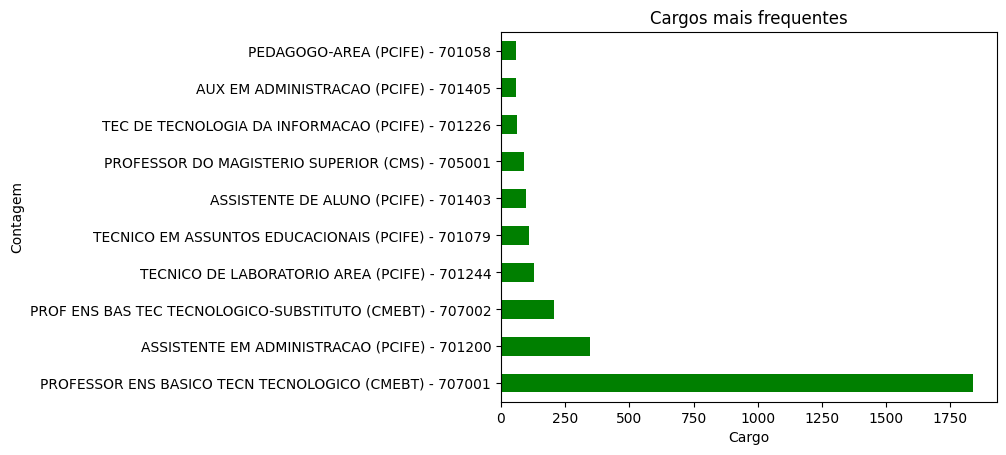

In [55]:
contagem = tabela['Cargo'].value_counts().head(10)
pao = contagem.plot(kind='barh', color='#007F00')
plt.title('Cargos mais frequentes')
plt.xlabel('Cargo')
plt.ylabel('Contagem')
plt.show()

Nos 30 campus os professores estão distribuidos da seguinte forma:

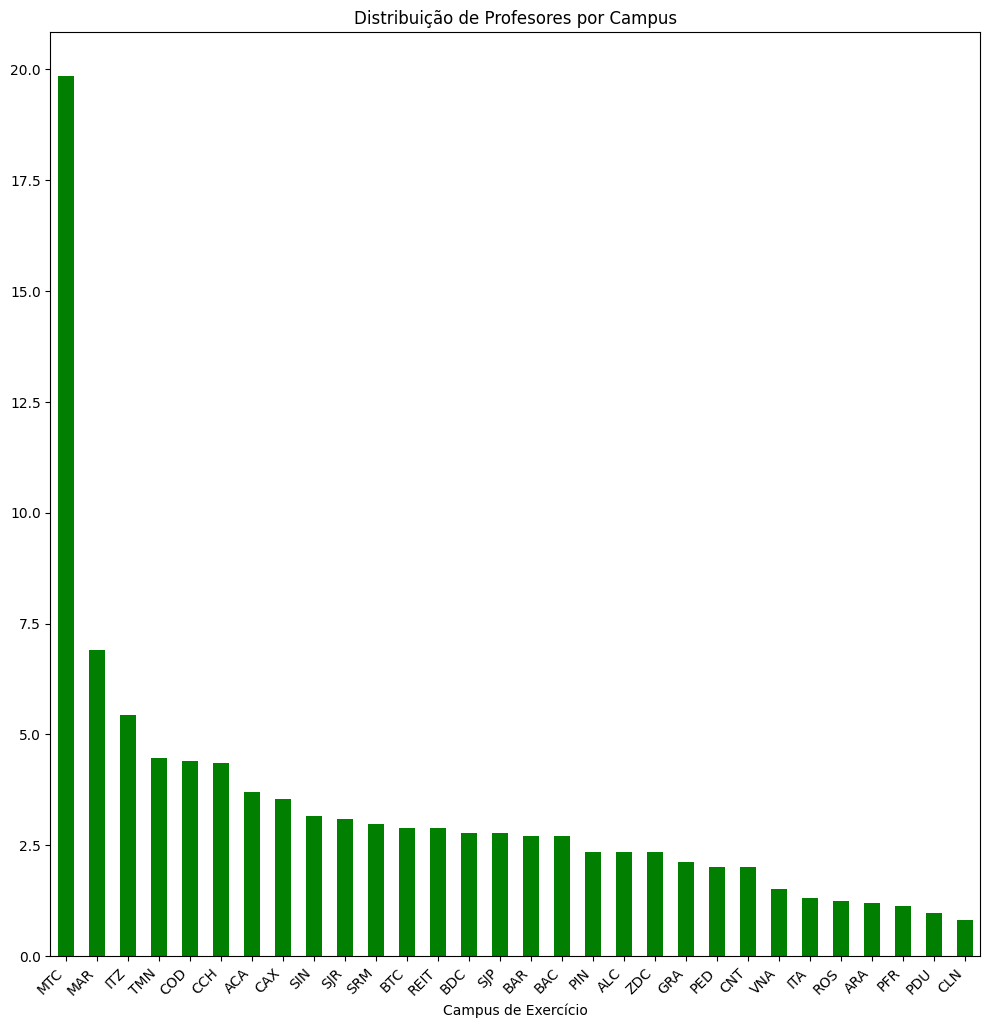

In [54]:
professores = tabela[tabela['Cargo'] == 'PROFESSOR ENS BASICO TECN TECNOLOGICO (CMEBT) - 707001']
setores_professores = professores['Campus Exercício']
porcentagens = setores_professores.value_counts(normalize=True) * 100
plt.figure(figsize=(12, 12))
ax = porcentagens.plot(kind='bar', color='#007F00')
plt.title('Distribuição de Profesores por Campus')
plt.xlabel('Campus de Exercício')
plt.xticks(rotation=45, ha='right')
plt.show()

# CAMPUS
O Instituto Federal de Educação, Ciência e Tecnologia do Maranhão conta com 30 campus no total.
O Campus São Luís - Monte Castelo (MTC) é o que contem mais servidores ativos.

In [41]:
contagemCampus = tabela['Campus de Lotação'].value_counts().reset_index()
contagemCampus.columns = ['Campus', 'Quantidade de Servidores']
pd.set_option('display.max_rows', None)
display(contagemCampus)

,Campus,Quantidade de Servidores
0,MTC,485
1,REIT,371
2,MAR,204
3,ITZ,189
4,COD,153
5,TMN,147
6,CCH,146
7,ACA,128
8,CAX,125
9,SIN,107


# CONCLUSÕES
- Existem 3.437 servidores ativos, onde 2.136 são professores e 190 são técnicos.
